In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
from pathlib import Path
import zipfile
import cv2 as cv


In [114]:
dfs = [[] for _ in range(10)]
for i in range(10):
    for k in range(100):
        df = pd.read_csv(f"training_data/stroke_{i}_{k+1:04}.csv", header=None)
        # df = (df - df.min()) / (df.max()-df.min())
        df = (df - df.mean()) / (df.std())
        dfs[i].append(df)


In [115]:
def rasterize(df, size, thickness=5):
    tmp = np.zeros((size, size))
    pts = df[[0,1]] * size
    pts = df[[0,1]] * size/6 + size/2
    pts = pts.to_numpy().astype(np.int32)
    for j in range(len(pts)-1):
        tmp = cv.line(tmp, pts[j], pts[j+1], 1, thickness)
    return tmp


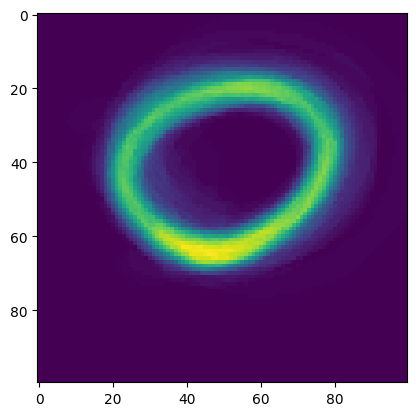

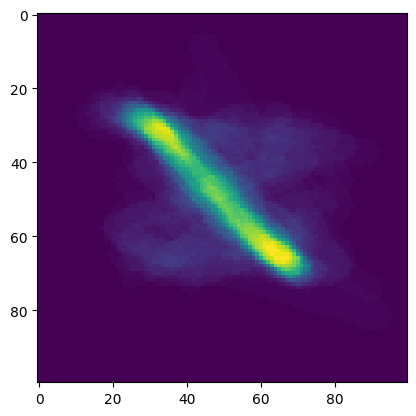

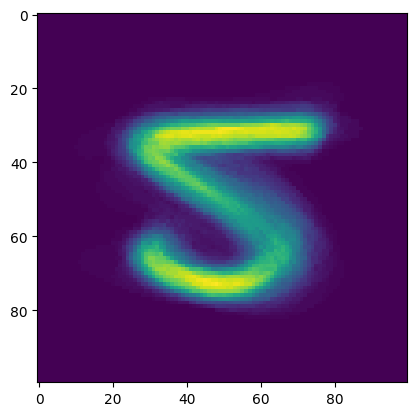

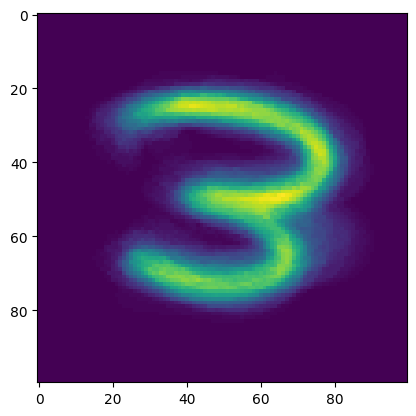

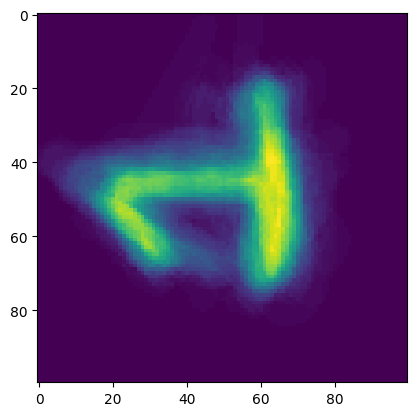

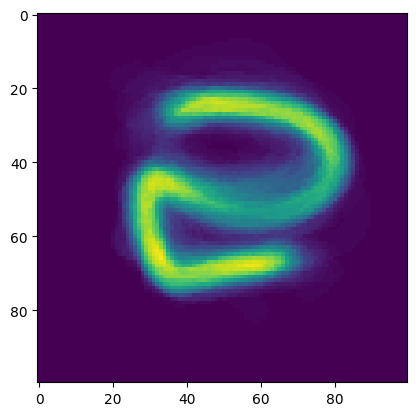

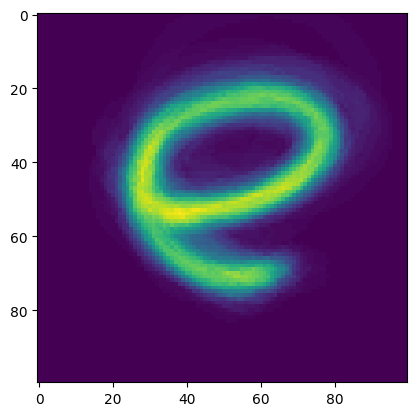

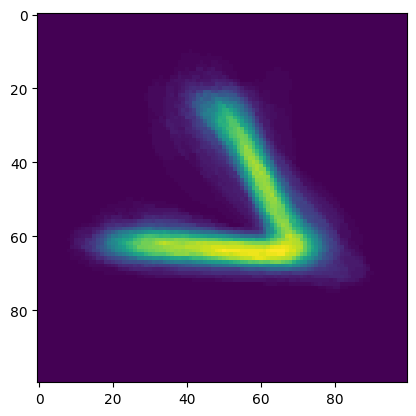

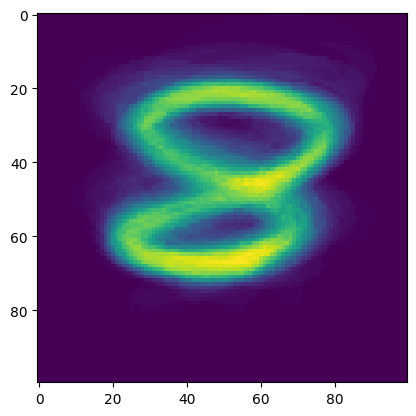

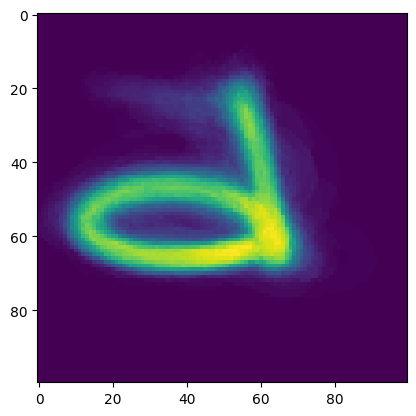

In [116]:
SIZE = 100
template_size = (SIZE, SIZE)
templates = [np.zeros(template_size) for _ in range(10)]

for num in range(10):
    for i in range(90):
        tmp = np.zeros(template_size)
        df = dfs[num][i]
        templates[num] += rasterize(df, SIZE)

    templates[num] /= np.sum(templates[num])
    plt.imshow(templates[num])
    plt.show()


In [117]:
correct = 0
incorrect = 0
for num in range(10):
    for i in range(90, 100):
        df = dfs[num][i]
        tmp = rasterize(df, SIZE,5)

        scores = []
        for ti, template in enumerate(templates):
            score = np.sum(tmp * template)
            scores.append(score)

        print(f"Num: {num}, Estimate: {np.argmax(scores)}")
        if np.argmax(scores) == num:
            correct += 1
        else:
            incorrect += 1

print(f"Correct: {correct}, Incorrect: {incorrect}")


Num: 0, Estimate: 0
Num: 0, Estimate: 0
Num: 0, Estimate: 0
Num: 0, Estimate: 0
Num: 0, Estimate: 0
Num: 0, Estimate: 0
Num: 0, Estimate: 0
Num: 0, Estimate: 0
Num: 0, Estimate: 0
Num: 0, Estimate: 0
Num: 1, Estimate: 7
Num: 1, Estimate: 7
Num: 1, Estimate: 1
Num: 1, Estimate: 1
Num: 1, Estimate: 7
Num: 1, Estimate: 1
Num: 1, Estimate: 1
Num: 1, Estimate: 1
Num: 1, Estimate: 1
Num: 1, Estimate: 1
Num: 2, Estimate: 2
Num: 2, Estimate: 2
Num: 2, Estimate: 2
Num: 2, Estimate: 2
Num: 2, Estimate: 2
Num: 2, Estimate: 2
Num: 2, Estimate: 2
Num: 2, Estimate: 2
Num: 2, Estimate: 2
Num: 2, Estimate: 2
Num: 3, Estimate: 7
Num: 3, Estimate: 3
Num: 3, Estimate: 3
Num: 3, Estimate: 3
Num: 3, Estimate: 9
Num: 3, Estimate: 3
Num: 3, Estimate: 3
Num: 3, Estimate: 3
Num: 3, Estimate: 3
Num: 3, Estimate: 3
Num: 4, Estimate: 4
Num: 4, Estimate: 7
Num: 4, Estimate: 4
Num: 4, Estimate: 4
Num: 4, Estimate: 1
Num: 4, Estimate: 4
Num: 4, Estimate: 4
Num: 4, Estimate: 4
Num: 4, Estimate: 1
Num: 4, Estimate: 4
